<a href="https://colab.research.google.com/github/CrushinAngel/Galaxias-en-Deep-Fields/blob/main/Deep_Fields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Galaxias en todas partes: analizando campos ultra profundos MUSE

#### Integrantes
*   Angel Cerda
*   Benjamin Jeréz
*   Francisco Molina

Profesor guía: Francisco Urbina


In [9]:
# Para empezar, instalamos las librerías necesarias y montamos el drive con el
# cubo de datos escogido para el análisis inicial

from google.colab import drive
drive.mount('/content/drive')

import astropy.io.fits as F
from astropy.wcs import WCS
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!pip install zap
!pip install mpdaf

In [3]:
# Abrimos el cubo de datos con astropy para poder acceder tanto al header como
# a los datos

cube_path = '/content/drive/MyDrive/DeepFields/ADP.2023-04-11T12_41_59.150.fits'

cubo = F.open(cube_path)

In [4]:
cubo[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'ESO-PARANAL'        / European Southern Observatory                  
TELESCOP= 'ESO-VLT-U4'         / ESO <TEL>                                      
INSTRUME= 'MUSE    '           / Instrument used.                               
RA      =            53.161044 / offset applied!                                
DEC     =           -27.778713 / offset applied!                                
EQUINOX =               2000.0 / Standard FK5                                   
RADECSYS= 'FK5     '           / Coordinate system                              
EXPTIME =             114000.0 / Integration time                               
MJD-OBS =       56921.300636

In [12]:
cubo[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  323                                                  
NAXIS2  =                  322                                                  
NAXIS3  =                 3681                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    3 / Number of coordinate axes                      
CRPIX1  =                  1.0 / Pixel coordinate of reference point            
CRPIX2  =                  1.0 / Pixel coordinate of reference point            
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'             

In [5]:
datos = cubo[1].data

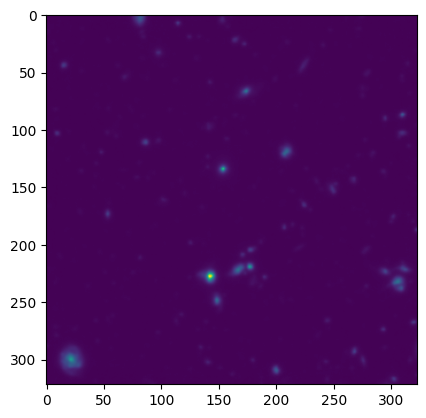

In [7]:
white_light_image = np.sum(datos, axis=0)

plt.imshow(white_light_image)

In [14]:
from astropy.utils.exceptions import AstropyWarning
import warnings
warnings.simplefilter('ignore', category=AstropyWarning)
# Esto lo añadimos pues astropy cambia las coordenadas, y así se ignora ese warning específico

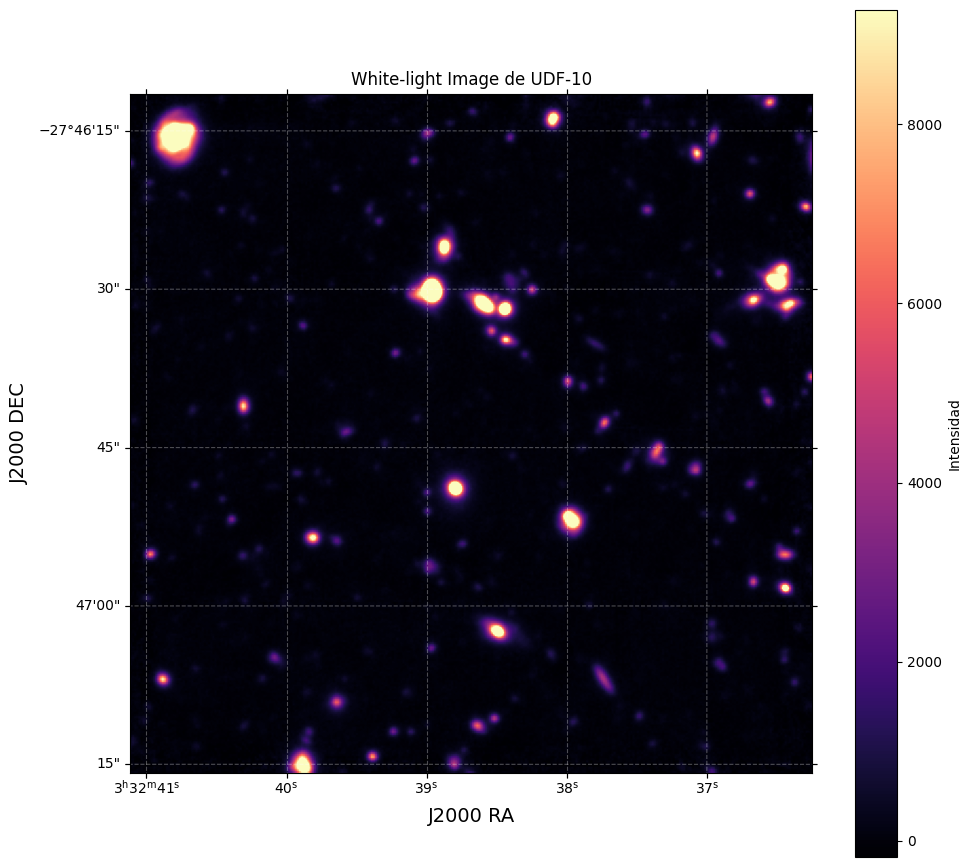

In [19]:
wcs = WCS(cubo[1].header)
wcs = wcs[0,:,:]

val = 0.5
percentiles = np.nanpercentile(white_light_image.flatten(), [val, 100-val])


plt.figure(figsize = (11, 11))

plt.subplot(projection = wcs)
plt.imshow(white_light_image, cmap = 'magma')
plt.clim(percentiles[0], percentiles[1])
plt.colorbar(label = 'Intensidad')


# Labels y título
plt.title('White-light Image de UDF-10')
plt.xlabel('J2000 RA', fontsize = 14)
plt.ylabel('J2000 DEC', fontsize = 14)

plt.grid(color='white', ls='--', alpha = 0.3)
plt.show()
